In [1]:
!pip install kagglehub joblib matplotlib seaborn scikit-learn

In [3]:
import kagglehub
import pandas as pd
import os

# 1. Download the dataset path
print("Downloading dataset...")
path = kagglehub.dataset_download("teamincribo/credit-card-fraud")

print(f"Path to dataset files: {path}")

# 2. Find the CSV file in the downloaded folder
# This ensures we get the right file regardless of its exact name
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
full_file_path = os.path.join(path, csv_file)

print(f"Loading file: {full_file_path}")

# 3. Load into Pandas
df = pd.read_csv(full_file_path)

# 4. Continue with inspection
print(f"Dataset Shape: {df.shape}")
df.head()

100%|██████████| 1.62M/1.62M [00:00<00:00, 2.84MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/teamincribo/credit-card-fraud/versions/10
Loading file: /root/.cache/kagglehub/datasets/teamincribo/credit-card-fraud/versions/10/credit_card_fraud.csv
Dataset Shape: (8000, 20)


,Transaction Date and Time,Transaction Amount,Cardholder Name,Card Number (Hashed or Encrypted),Merchant Name,Merchant Category Code (MCC),Transaction Location (City or ZIP Code),Transaction Currency,Card Type,Card Expiration Date,CVV Code (Hashed or Encrypted),Transaction Response Code,Transaction ID,Fraud Flag or Label,Previous Transactions,Transaction Source,IP Address,Device Information,User Account Information,Transaction Notes
0,2022-09-24 13:54:27,285.88,Shray Soman,daca51bffe0fc4eaaa7c430917f94b75fd893712492254...,"Rajagopalan, Ghose and Kant",3590,Khammam,INR,MasterCard,04/29,01299ac65733b5a3d774265fbfe8396b8611e5e3321855...,5,b7f69cbc-a03d-41f8-adca-75920b0242c3,1,NaN,Online,18.106.240.6,Tablet,NaN,Consequatur corporis minima ad vero deserunt n...
1,2020-07-24 11:20:13,1777.32,Lakshit Bakshi,d5366dd9be3a0266c0252baceaa6332210ed4dbd0ef252...,Sule PLC,7277,Vasai-Virar,EUR,American Express,03/26,ad8fa913d25b3970c6efa8ca504da8ba670ce2a9cf012d...,12,ad53cc8e-8412-422e-8cad-4176daac8387,1,NaN,Online,212.48.185.128,Mobile,jloyal,Dolore repellendus odio deleniti. Eaque quibus...
2,2023-03-18 01:05:36,3939.01,Riya Bobal,4737a6384aa1c3c31f7768b86633d6a8401dd6ab4a8ff1...,Badal PLC,9297,Nangloi Jat,USD,Visa,11/29,eb3be230bbd2844b1f5d8f2e4fab9ffba8ab22cfeeb69c...,5,f09cecd6-0d74-4551-8089-a31d64e6b9c5,1,3 or more,In-Person,17.190.112.46,Mobile,NaN,Unde beatae perspiciatis sapiente. Voluptates ...
3,2021-01-07 21:53:04,376.44,Mohanlal Balakrishnan,4721806eed8f2663bb597ff13e79a294de318358fbb54b...,Konda-Sodhi,5686,Ramagundam,USD,Visa,09/25,891d46993a36d78392247c642138cede01d9841daab1d9...,5,b208ae0b-4c4f-428f-b6b9-5360b288b947,0,2,In-Person,153.136.24.104,Tablet,NaN,Cupiditate repellendus necessitatibus quo occa...
4,2021-12-16 06:22:24,1687.33,Mannat Rout,9deacc3a9efd6e382826d400620aca5f23ed94327578e5...,Dua Ltd,2940,Adoni,INR,MasterCard,03/31,48a1a756f2d83f1dc57bbf14052b70a6f40d0fceed6662...,5,6b4e4e43-5b73-4906-9973-299a1b2a5e71,1,2,Online,196.153.28.131,Desktop,NaN,Molestias assumenda consectetur itaque veritat...


Training Random Forest...

--- Final Evaluation Report ---
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       597
           1       0.49      0.47      0.48       595

    accuracy                           0.49      1192
   macro avg       0.49      0.49      0.49      1192
weighted avg       0.49      0.49      0.49      1192



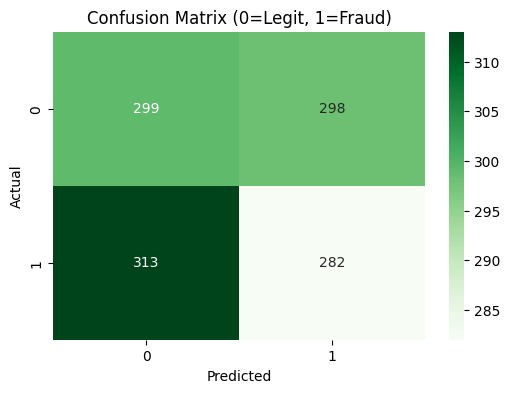

/tmp/ipython-input-3133287488.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


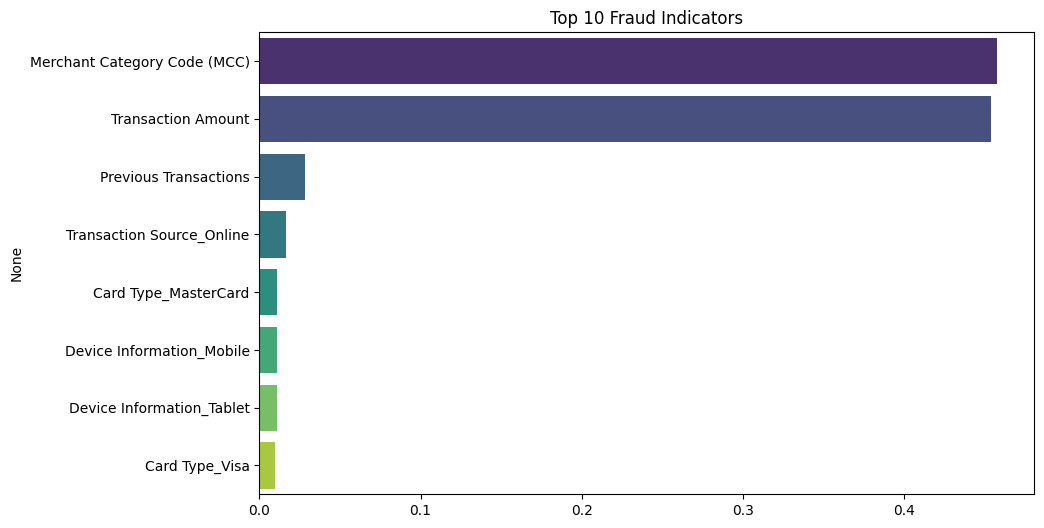

Model saved successfully!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# --- 1. INSPECTION & CLEANING ---
# Rename target column for consistency
df = df.rename(columns={'Fraud Flag or Label': 'Class'})

# Select useful columns
selected_features = [
    'Transaction Amount',
    'Merchant Category Code (MCC)',
    'Transaction Source',
    'Card Type',
    'Device Information',
    'Previous Transactions',
    'Class'
]

df_clean = df[selected_features].copy()
df_clean.dropna(inplace=True)

# --- 🚿 THE FIX: CLEAN "PREVIOUS TRANSACTIONS" ---
# Replace '3 or more' with the number 3, and make sure the whole column is numbers
df_clean['Previous Transactions'] = df_clean['Previous Transactions'].replace('3 or more', 3)
df_clean['Previous Transactions'] = pd.to_numeric(df_clean['Previous Transactions'])

# --- 2. ENCODING CATEGORICAL DATA ---
categorical_cols = ['Transaction Source', 'Card Type', 'Device Information']
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# --- 3. SPLIT & SCALE ---
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Stratified Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale Numeric Columns
scaler = StandardScaler()
cols_to_scale = ['Transaction Amount', 'Merchant Category Code (MCC)', 'Previous Transactions']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# --- 4. TRAIN RANDOM FOREST ---
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# --- 5. EVALUATE ---
y_pred = rf_model.predict(X_test)

print("\n--- Final Evaluation Report ---")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (0=Legit, 1=Fraud)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --- 6. FEATURE IMPORTANCE ---
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title("Top 10 Fraud Indicators")
plt.show()

# Save
joblib.dump(rf_model, "fraud_model_custom.pkl")
print("Model saved successfully!")